## Imports

In [11]:
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt, dates
import pandas as pd, matplotlib.ticker as mtick

## Generating the data

In [12]:
data = pd.DataFrame(columns=['Date','Options','LP'])
# Fill the Date column with the dates
data['Date'] = pd.date_range('1/1/2021', periods=52, freq='W')
# Fill the Options and and LP columns with random numbers with Gaussian distribution between -0.1 and 0.1, 3 decimal places
data['Options'] = np.round(np.random.normal(0.0025,0.005,52),3)
data['LP'] = np.round(np.random.normal(0.0025, 0.005, 52), 3)

In [13]:
data.head()

,Date,Options,LP
0,2021-01-03,0.006,0.005
1,2021-01-10,0.000,0.004
2,2021-01-17,0.009,0.007
3,2021-01-24,-0.004,0.002
4,2021-01-31,0.003,0.005


## Formatting the data for charting

In [14]:

data['cum_options'] = data['Options'].cumsum()
data['cum_lp'] = data['LP'].cumsum()
data['date_chart'] = data['Date'].dt.strftime('%Y-%m-%d')

## Stacked bar chart

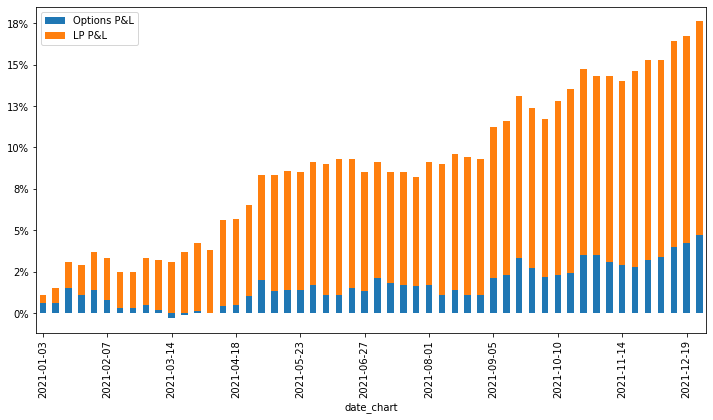

In [15]:
# draw a stacked bar chart of the cumulative sum of the Options and LP columns
chart = data.plot(x='date_chart', y=['cum_options','cum_lp'], kind='bar', stacked=True)
# set y-axis format to be in percentage with % sign
chart.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# set x-axis ticks to be monthly
locator = mtick.MultipleLocator(base=5)
chart.xaxis.set_major_locator(locator)
# Set the legend to be 'Options P&L' and 'LP P&L'
chart.legend(['Options P&L', 'LP P&L'])
# set the chart size to be 12x6
chart.figure.set_size_inches(12,6)

## Line plot

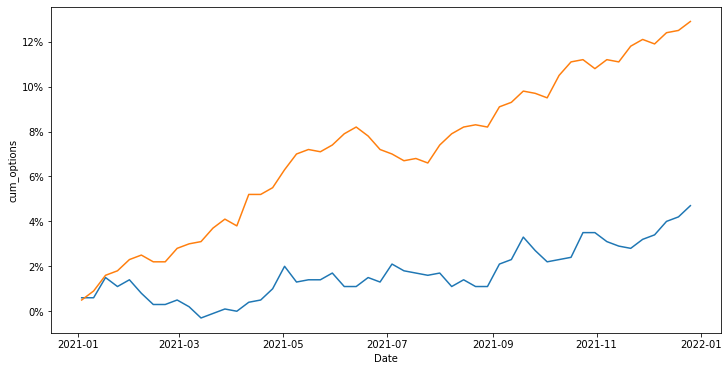

In [16]:
line_plot = sns.lineplot(x='Date', y='cum_options', data=data)
sns.lineplot(x='Date', y='cum_lp', data=data)
# set the seaborn y axis to be in percentage with % sign
line_plot.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# figure size is 12x6
line_plot.figure.set_size_inches(12,6)

## Sum bar chart

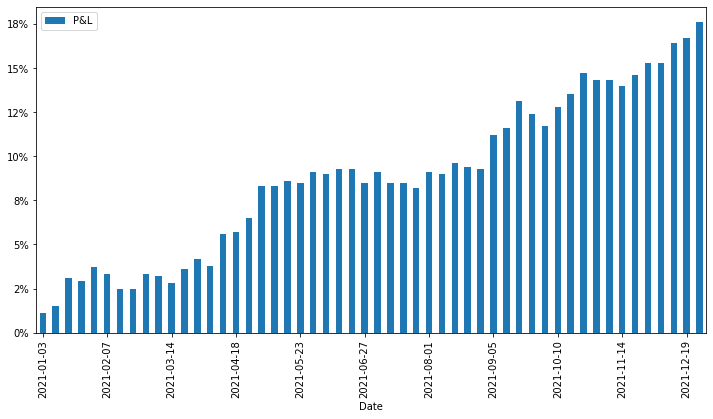

In [17]:
# draw a stacked bar chart of the cumulative sum of the Options and LP columns
data['sum'] = data.cum_lp + data.cum_options
chart = data.plot(x='date_chart', y='sum', kind='bar')
chart.set_xlabel('Date')
# set y-axis format to be in percentage with % sign
chart.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# set x-axis ticks to be monthly
locator = mtick.MultipleLocator(base=5)
chart.xaxis.set_major_locator(locator)
# Set the legend to be 'Options P&L' and 'LP P&L'
chart.legend(['P&L'])
# set the chart size to be 12x6
chart.figure.set_size_inches(12,6)

## Export to CSV

In [18]:
data.to_csv('data/mock_data.csv', index=False)